In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from chap2_Perceptron import Perceptron

In [7]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/' 
'machine-learning-databases/iris/iris.data', header=None)

In [8]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
X = df.iloc[0:100, [0, 2]].values
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

In [10]:
y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-versicolor', 1, -1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

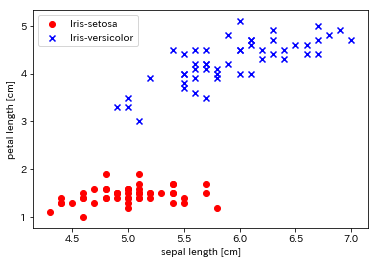

In [11]:
%matplotlib inline
fig, ax = plt.subplots(ncols=1,nrows=1)
ax.scatter(X[0:50, 0], X[0:50, 1], color='r', marker='o', label='Iris-setosa')
ax.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='Iris-versicolor')
ax.legend(loc='upper left')
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('petal length [cm]')

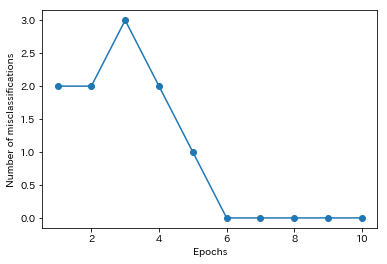

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

In [13]:
# 決定境界をplotする関数の定義
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    #                        np.arange(x2_min, x2_max, resolution))
    xx1, xx2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    #Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # contourf で等高線を色付け
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

[matplotlib.colors.ListedColormap](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.colors.ListedColormap.html)

↑リストからColormapオブジェクトを作る．

[markerについてはここ参照](https://matplotlib.org/devdocs/api/markers_api.html?highlight=marker#module-matplotlib.markers)

In [14]:
#   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) の確認
np.array([[1,2],[3, 4]]).T

array([[1, 3],
       [2, 4]])

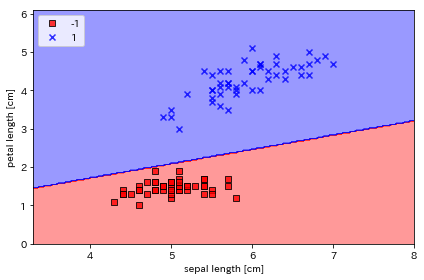

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

以下ADALINEについて

In [16]:
from chap2_AdalineGD import AdalineGD

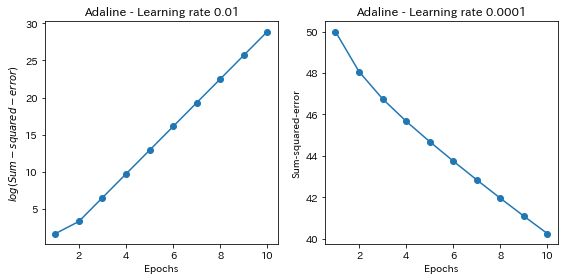

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel(r'$log(Sum-squared-error)$')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

In [18]:
ada2.cost_, ada1.cost_

([50.0,
  48.069162686025493,
  46.756247850736642,
  45.675881529053832,
  44.6913293479668,
  43.753888361923508,
  42.846027487584522,
  41.961257613784404,
  41.097004964113069,
  40.252087948337085],
 [50.0,
  2230.8539602549999,
  3475977.0425619674,
  5423372722.5878315,
  8461791557634.3311,
  13202470134517624.0,
  2.0599091394023023e+19,
  3.2139634624124605e+22,
  5.0145712449819432e+25,
  7.8239609955381275e+28])

In [19]:
# 標準化
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std.mean(axis=0), X_std.std(axis=0)

(array([ -1.51822999e-15,  -3.86357613e-16]), array([ 1.,  1.]))

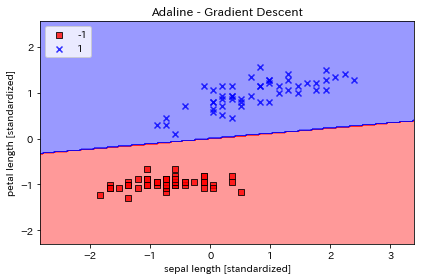

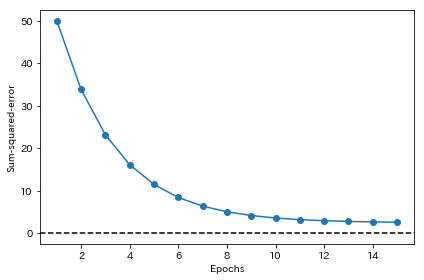

In [20]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.axhline(color='k', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

In [21]:
a = np.arange(3).dot(2)
a

array([0, 2, 4])

In [22]:
idx = np.random.permutation(len(a))
idx

array([1, 0, 2])

In [23]:
a[idx]

array([2, 0, 4])

In [24]:
a

array([0, 2, 4])

AdalineのSGDについて

In [25]:
from chap2_AdalineSGD import AdalineSGD

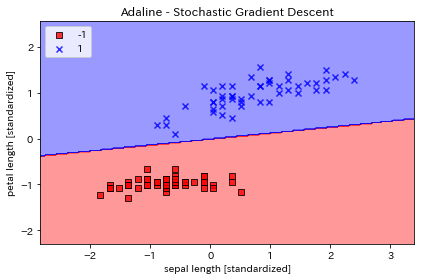

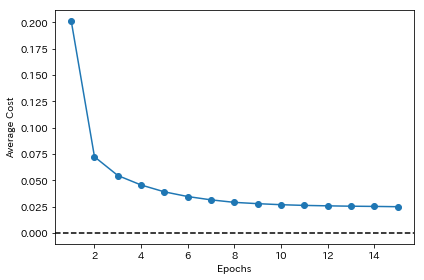

In [27]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./adaline_4.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.axhline(color='k', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()
